# Håndtering af tekst (strings) i Python

Lad os se på, hvordan man arbejder med enkelte tekstværdier i Python.

## String metoder

En tekstværdi kaldes en "string" inden for programmeringssprog. For at arbejde med tekst, er det relevant at vide, hvordan Python arbejder med enkelte tekstværdier.

Vi ser herunder nærmere på indbyggede string-metoder i Python


In [5]:
tweet = tweets_df.loc[584, 'full_text']
print(tweet)

Hjemmeværnet, Politikadetterne og Forsvaret klarer ærterne ved grænserne, så Politiet kan kaste sig over at gøre danskere mere trygge. Sikker på,at @ClausOxfeldt bliver lykkelig for vort krav. Han har jo brugt megen energi på at give DFs grænseindsats skylden for mandskabsmangel. https://t.co/PgenOdeSwn


In [6]:
type(tweet)

str

In [7]:
tweet.startswith("Hjemmeværn")

True

In [8]:
tweet.endswith("DF")

False

In [9]:
"energi" in tweet

True

In [10]:
"politi" in tweet # findes ikke, da politi står med stort

False

In [11]:
"politi" in tweet.lower()

True

In [12]:
tweet.upper()

'HJEMMEVÆRNET, POLITIKADETTERNE OG FORSVARET KLARER ÆRTERNE VED GRÆNSERNE, SÅ POLITIET KAN KASTE SIG OVER AT GØRE DANSKERE MERE TRYGGE. SIKKER PÅ,AT @CLAUSOXFELDT BLIVER LYKKELIG FOR VORT KRAV. HAN HAR JO BRUGT MEGEN ENERGI PÅ AT GIVE DFS GRÆNSEINDSATS SKYLDEN FOR MANDSKABSMANGEL. HTTPS://T.CO/PGENODESWN'

## String metoder i pandas

Mange string metoder kan anvendes på pandas series - ofte ved at tilføje `.str`

In [13]:
tweets_df['full_text'].str.startswith("Hjemmeværn").head()

0    False
1    False
2    False
3    False
4    False
Name: full_text, dtype: bool

In [14]:
tweets_df['full_text'].str.startswith("Hjemmeværn").sum() # Hvor mange tweets starter med hjemmeværn?

1

`str.contains()` på en pandas series svarer til at bruge `in` på en string.

In [15]:
tweets_df['full_text'].str.contains("DF").sum() # Hvor mange tweets taler om DF?

118

Fordi metoder som `str.startswith()` og `str.contains()` returnerer logiske værdier (`True`/`False`), så kan de bruges til subsetting.

In [16]:
DFtweets_df = tweets_df.loc[tweets_df['full_text'].str.contains("DF"), :]
DFtweets_df

,created_at,id,full_text,is_quote_status,retweet_count,favorite_count,favorited,retweeted,is_retweet,hashtags,urls,user_followers_count,party
36,2019-01-24 22:39:33+00:00,1088567004733341700,@RosenkrantzT @Spolitik @alternativet_ Det er ...,False,1,4,False,False,False,[],[],4064,Alternativet
375,2020-10-22 10:02:29+00:00,1319217553772859400,"Har igen, kl. 13 (sammen med V, K og DF) indka...",False,8,54,False,False,False,"['dkpol', 'dksocial']",[],4064,Alternativet
513,2019-12-12 13:56:01+00:00,1205124148260954000,Ifølge DR har i al fald den ene af de terror-s...,False,7,55,False,False,False,[],"[{'url': 'https://t.co/D6WhHzVVgu', 'expanded_...",12276,Dansk Folkeparti
515,2020-12-05 11:44:00+00:00,1335188170040897500,"Havde håbet på meget mere på ældreområdet, her...",False,3,4,False,False,False,['dkpol'],"[{'url': 'https://t.co/HYLZ24Z632', 'expanded_...",2748,Dansk Folkeparti
520,2018-08-08 13:23:10+00:00,1027183438510608400,"Spørgelysten var stor på det pressemøde, der t...",False,3,18,False,False,False,"['dkpol', 'FL19']",[],12276,Dansk Folkeparti
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4737,2018-11-30 22:19:14+00:00,1068630561709875200,“Alternativet er dybt politisk uenige i DF’s p...,False,0,2,False,False,False,"['dkpol', 'derforuffe', 'alternativet']",[],3109,Uden for folketingsgrupperne
4750,2020-07-08 17:40:44+00:00,1280919762999132200,@DonPeHa Fordi der hele tiden bliver hetzet im...,False,0,0,False,False,False,[],[],37443,Uden for folketingsgrupperne
5039,2017-01-26 08:26:32+00:00,824533970201223200,Til afrikansk topmøde Addis Ababa: Meget bekym...,False,19,41,False,False,False,"['globalgagrule', 'dk4hrc', 'dkpol']",[],5749,Venstre
5087,2019-04-11 08:11:51+00:00,1116252507360174100,På administration i sundhedsvæsenet bruger Dan...,False,30,176,False,False,False,"['dkpol', 'sundpol']",[],26669,Venstre


Dette subset kan vi visualisere, og dermed få et hurtigt overblik over, hvilke partier, der tweeter om "DF"

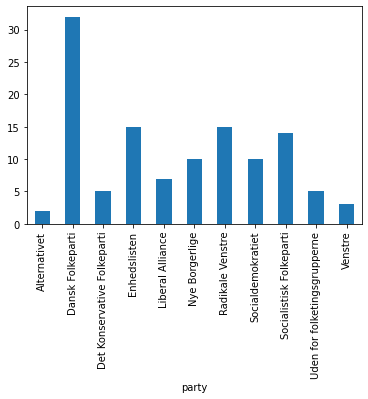

In [17]:
DFtweets_df.groupby('party').size().plot.bar()

## ØVELSE 2: Simpel teksthåndtering

I øvelserne i dag skal i arbejde med et datasæt bestående af kommentarer fra reddit. Alle kommentarer er taget fra posts på r/denmark (reddit.com/r/denmark) fra 1/3-8/3 2021.

1. Indlæs data som en pandas data frame
    - Link til data: https://raw.githubusercontent.com/CALDISS-AAU/course_ndms-I/master/datasets/reddit_rdenmark-comments_01032021-08032021_long.csv
2. Dan et subset bestående af alle kommentarer, der nævner "menneskerettigheder" (kommentarteksten er i kolonnen `comment_body`). Hvor mange kommentarer er der?

**Bonus**
- Kan du udregne gennemsnitsscore for de kommentarer, der nævner menneskerettigheder? (score fremgår af kolonnen `comment_score`)